In [2]:
import ROOT
import glob
import math
import numpy as np
from IPython.display import display, Markdown
from IPython.display import display, HTML
from TPCQCVis.src.drawHistograms import *
from TPCQCVis.src.drawTrending import *
from TPCQCVis.src.checkHistograms import *

Welcome to JupyROOT 6.26/04


In [3]:
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>table {float:left;}</style>"))

In [4]:
# Read the Root Files
path = "/home/berki/alice/data/2022/LHC22m/"
fileList = glob.glob(path+"*_QC.root")
fileList.sort()
#fileList = fileList[13:]
runList = [fileList[i][35:-8] for i in range(len(fileList))]
rootDataFile=[]
for file in fileList:
    rootDataFile.append(ROOT.TFile.Open(file,"READ"))
#rootDataFile[0].ls()
#rootDataFile[0].ClusterQC.ls()
#rootDataFile[0].PIDQC.ls()
#rootDataFile[0].TracksQC.ls()
#runList

In [5]:
%jsroot on

# Reporting on TPC QC for LHC22m
New processing with tags dating from 2022/08/30
> 13.6 TeV pp <br />
> Link to JIRA: https://alice.its.cern.ch/jira/browse/O2-3135 <br />
> B = +0.5 T <br />
> beam = pp <br />
> energy (sqrt) = 13.6 TeV <br />
> Runs after the TPC firmware upgrade on Aug. 10th

## Run list

+ `523141`
+ `523142`
+ `523144`
+ `523148`
+ `523182`
+ `523252`
+ `523257`
+ `523269`
+ `523298`
+ `523303`
+ `523306`
+ `523308`
+ `523309`
+ `523393`
+ `523397`
+ `523399`
+ `523441`
+ `523665`
+ `523669`
+ `523671`
+ `523677`
+ `523720`
+ `523721`
+ `523728`
+ `523731`
+ `523773`
+ `523779`
+ `523783`
+ `523786`
+ `523788`
+ `523789`
+ `523792`
+ `523797`
+ `523819`
+ `523821`
+ `523827`
+ `523828`
+ `523897`
+ `523898`

## General comments
+ Number of clusters vs eta distribution is not symmetrical
 + Weird shape on C side for low eta
+ Time gain calibration not applied on any of the runs except for `523141`, `523142`, `523148`.
 + Quality for all others can currently be taken as: `BAD`
+ Run `523144` has problems
+ Run `523897` is outlier in observables, but can be explained with lower IR



---
## Number of recorded tracks per run
+ Looking at entries in hPt histogram from tracks task
+ With cuts (nClusters > 60, |eta| < 1, dEdxTot > 20)

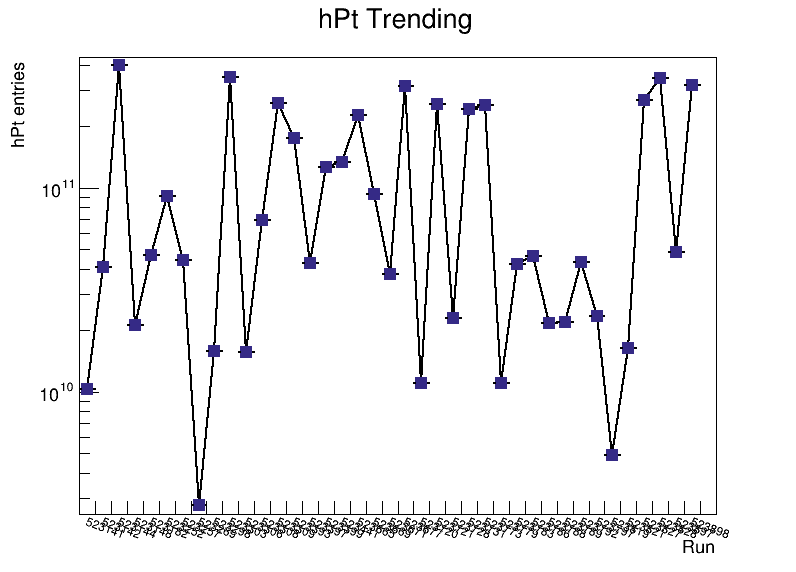

In [5]:
objectName="hPt;1"
[trend,canvas] = drawTrending(objectName,rootDataFile,names=runList,trend="entries",error="",log="logy",namesFromRunList=True)
canvas.Draw()

---
## Tracks QC

## Phi distribution of tracks:

+ General:
 + Sector boundaries more prominent compared to earlier periods.
 + Almost all runs suffer from regions of reduced efficiency due to out-of-sync FECs
 + Run `523144` has major problems, Quality of this run can be declared `BAD`

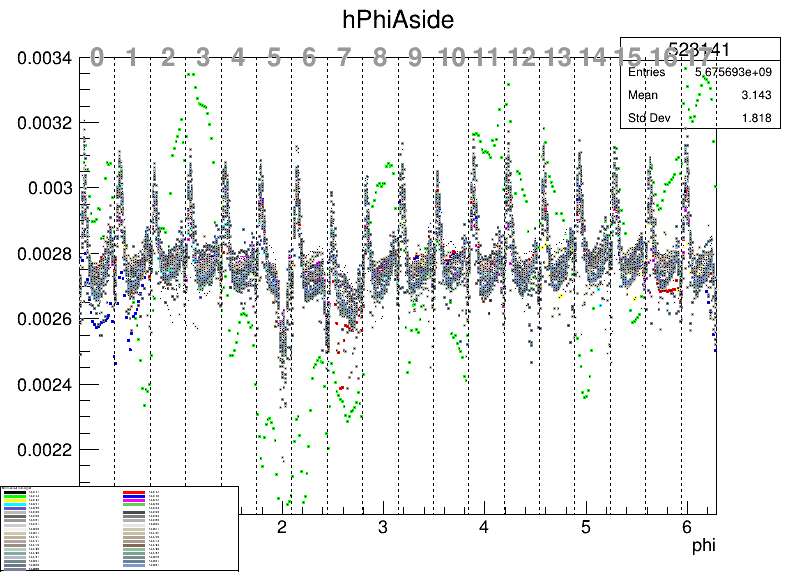

In [6]:
objectName="hPhiAside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False, yAxisRange = [2E-3,3.4E-3],drawOption="SAME L")

#Sector boundatries
pad1.cd()
sectorBoundary = ROOT.TLine(0,hist.GetMinimum(),0,hist.GetMaximum())
sectorBoundary.SetLineStyle(2)
sectorNum = ROOT.TText(.5,.5,"test")
sectorNum.SetTextAlign(22)
sectorNum.SetTextColor(ROOT.kGray+1)
sectorNum.SetTextFont(0)
for j in range(19):
    sectorBoundary.DrawLine((j*2*math.pi)/18,hist.GetMinimum(),(j*2*math.pi)/18,hist.GetMaximum())
    if j < 18 : sectorNum.DrawText(((j+0.5)*2*math.pi)/18,hist.GetMaximum(),str(j))
    
canvas.Draw()

### C-side 

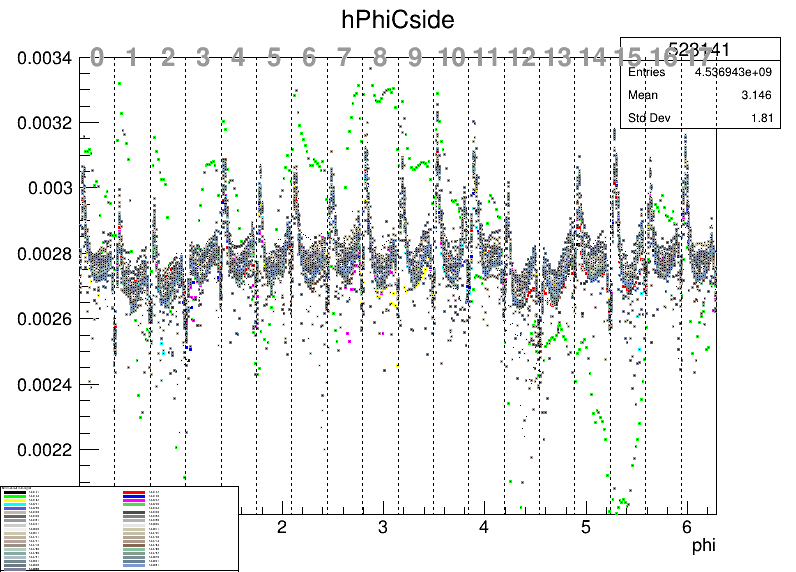

In [7]:
objectName="hPhiCside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False,yAxisRange = [2E-3,3.4E-3], drawOption="SAME L")
#Sector boundatries
pad1.cd()
sectorBoundary = ROOT.TLine(0,hist.GetMinimum(),0,hist.GetMaximum())
sectorBoundary.SetLineStyle(2)
sectorNum = ROOT.TText(.5,.5,"test")
sectorNum.SetTextAlign(22)
sectorNum.SetTextColor(ROOT.kGray+1)
sectorNum.SetTextFont(0)
for j in range(19):
    sectorBoundary.DrawLine((j*2*math.pi)/18,hist.GetMinimum(),(j*2*math.pi)/18,hist.GetMaximum())
    if j < 18 : sectorNum.DrawText(((j+0.5)*2*math.pi)/18,hist.GetMaximum(),str(j))
        
canvas.Draw()

### Number of clusters vs phi

+ Unexpected high number number of cluster tracks in Runs `523144`,`523182`,`523303`
  + Especially prominent on A side at phi ~3.8 (Boundary between sectors 10 & 11)
  + `Further investigation needed`
  + Also string loss in tracking efficiency for this run between C-side sector boundary between 8 & 9 
  
+ Tracks shorter in sectors A7, C1, C2 & C12
  + Due to dead segments
 

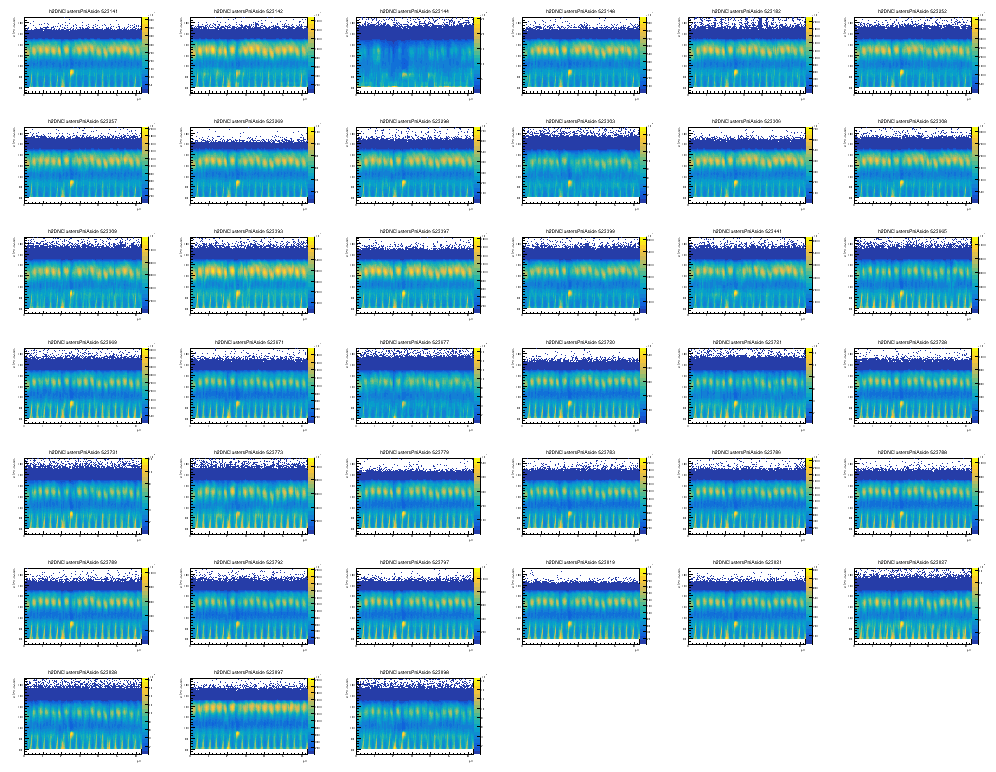

In [8]:
objectName="h2DNClustersPhiAside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=False,legend=False,legendNames=runList,pads=True,yAxisRange=[50,190],drawOption="COLZ")
canvas.Draw()

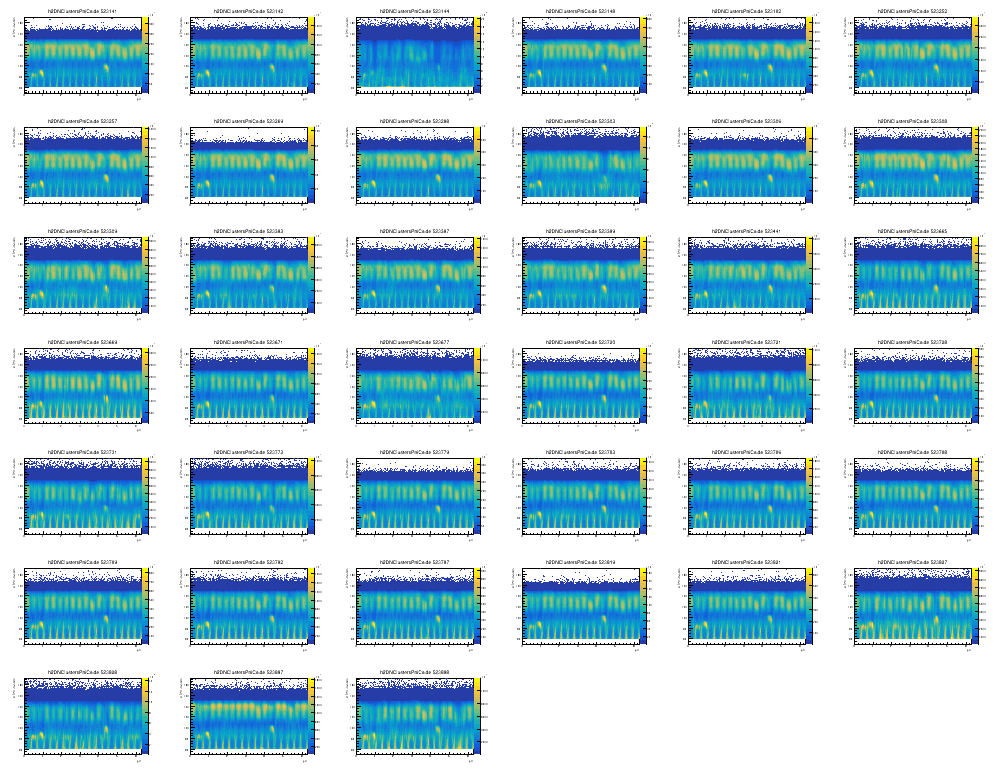

In [9]:
objectName="h2DNClustersPhiCside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=False,legend=False,legendNames=runList,yAxisRange=[50,190],pads=True,drawOption="COLZ")
canvas.Draw()

---
### Pt distribution

+ Most runs have similar shape
    + All OK
+ `523897` has less prominent high pt tail
    + This run had lower IR

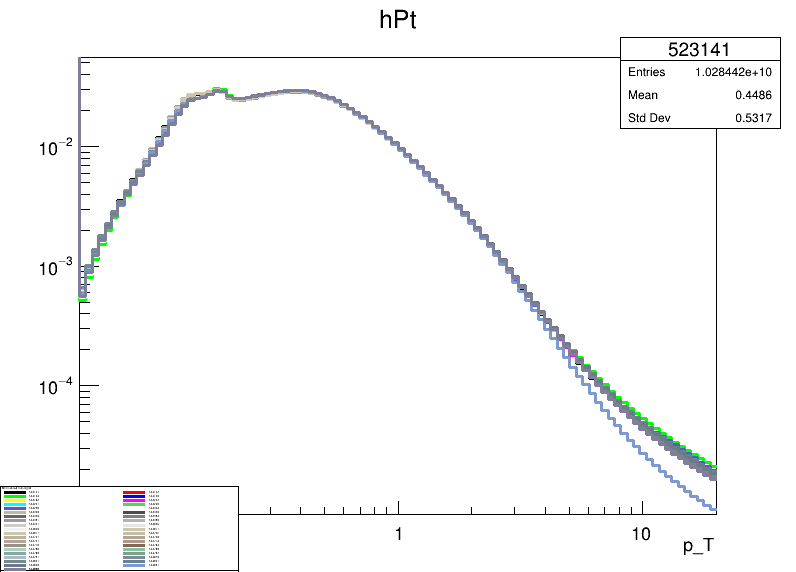

In [10]:
objectName="hPt"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,log="logxy",legendNames=runList,pads=False)
canvas.Draw()

---
### Clusters per track

+ Main peak shape is broader
+ Secondary peak also more prominent
+ Run `523897` better than the rest in terms of main peak position, longer tracks
    + This run had lower IR
+ Run `523144` problematic again

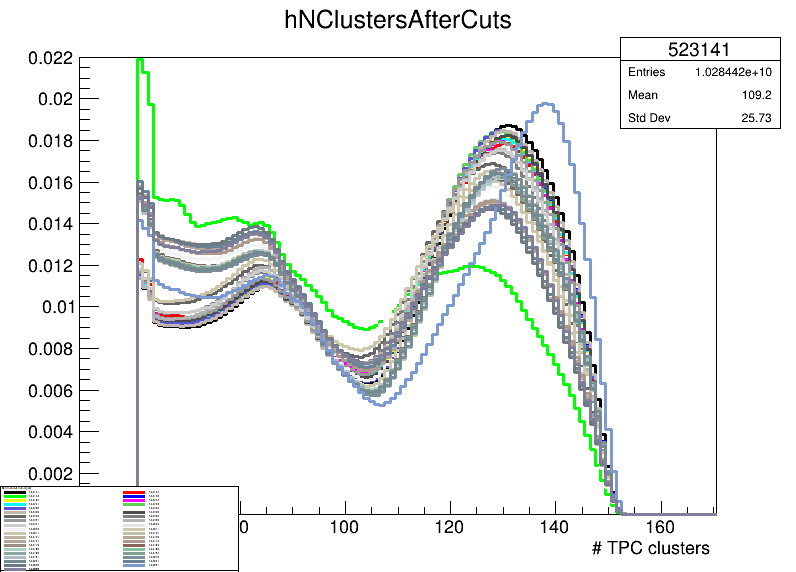

In [11]:
objectName="hNClustersAfterCuts"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,xAxisRange= [50,170],yAxisRange = [0,22E-3],pads=False)
canvas.Draw()

### Number of clusters vs eta
+ cluster distrubution not flat over eta especially for negative eta (C-side)
+ Still not understood

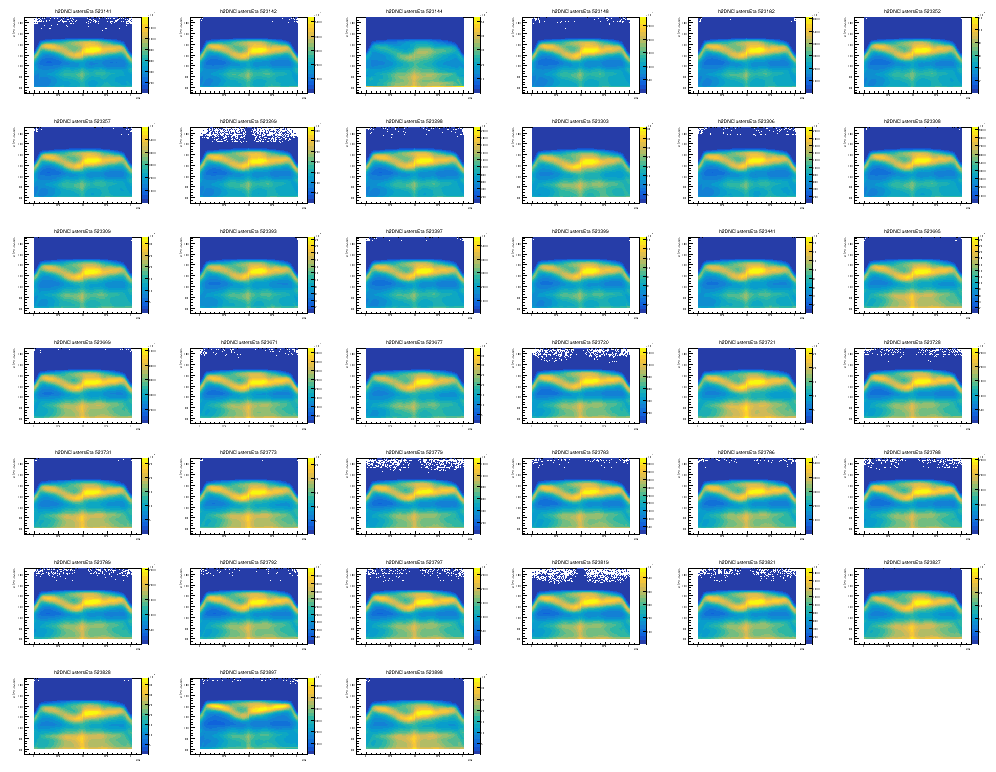

In [12]:
objectName="h2DNClustersEta"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=False,legend=False,legendNames=runList,pads=True,yAxisRange=[50,190],xAxisRange=[-1.2,1.2],drawOption="COLZ")
canvas.Draw()

---
### Sign of tracks

+ Ratio of pos/neg tracks consistent in all runs
  + Result: `GOOD`

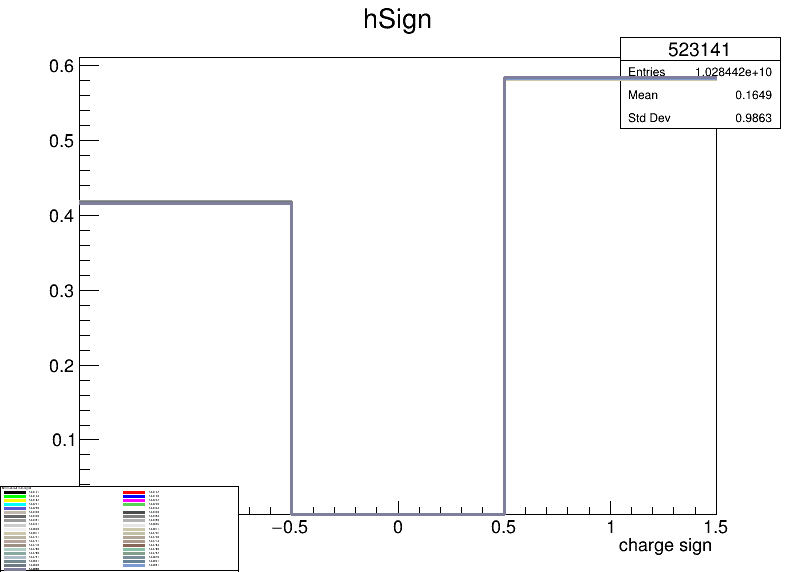

In [13]:
objectName="hSign"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False)
canvas.Draw()

---
## PID QC

### MIP signal
+ Time gain calibration not applied on any of the runs except for `523141`, `523142`, `523148`.
 + Quality for all others: `BAD`


In [6]:
objectName="hdEdxTotMIP_TPC"
quality = checkHistograms(objectName,rootDataFile,check="(histogram.Fit(\"gaus\",\"Sq\",\"\",40,60)) and 48<histogram.GetFunction(\"gaus\").GetParameter(1)<52",printQuality=True)
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,legendNames=runList,check=quality,normalize=False,log="logx",legend=False,pads=True)
canvas.Draw()

Name: /home/berki/alice/data/2022/LHC22m/523141_QC.root Title: : GOOD
Name: /home/berki/alice/data/2022/LHC22m/523142_QC.root Title: : GOOD
Name: /home/berki/alice/data/2022/LHC22m/523144_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523148_QC.root Title: : GOOD
Name: /home/berki/alice/data/2022/LHC22m/523182_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523252_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523257_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523269_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523298_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523303_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523306_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523308_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523309_QC.root Title: : BAD
Name: /home/berki/alice/data/2022/LHC22m/523393_QC.root Title: : BAD
Name: /home/berki/alice/data/20

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


---
### dEdx vs P
+ Unexpected bands observed in Run `523182` & `523269` & `523298`
+ Quality: **BAD**

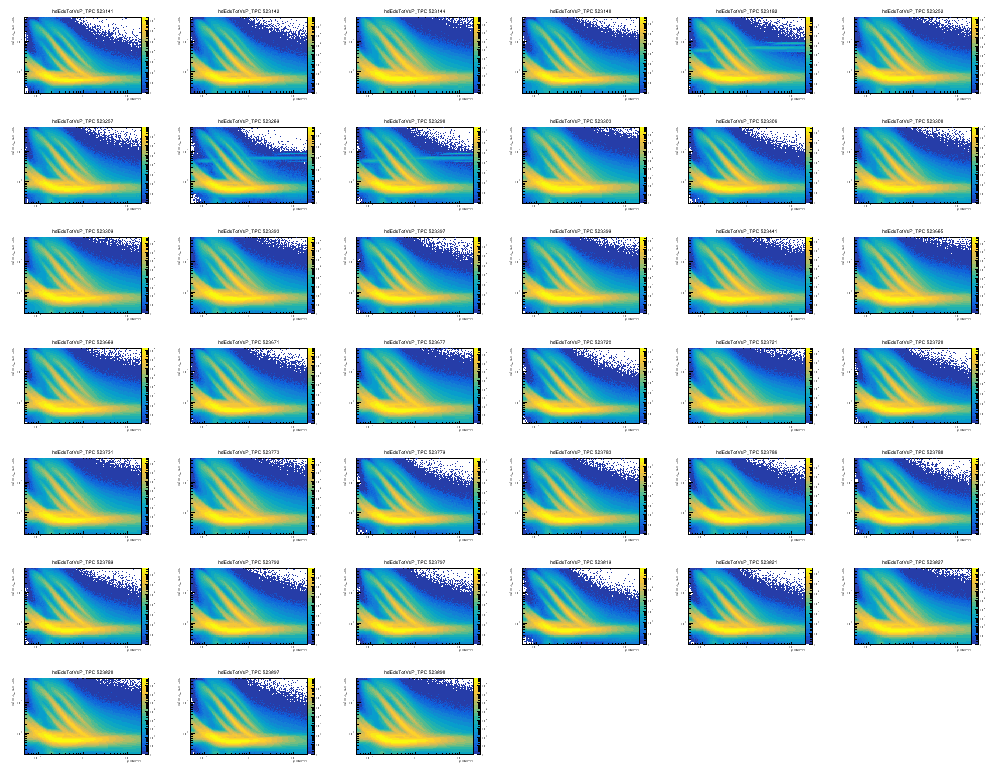

In [15]:
objectName="hdEdxTotVsP_TPC"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,legendNames=runList,log="logxyz",pads=True,drawOption="COLZ")
canvas.Draw()